## Resuelve los siguientes ejercicios en este archivo.

Pablo Padial Iniesta
David Ferreras Díaz

**_Ejercicio 1_**. En esta primera práctica has de implementar un algoritmo de integración numérica basado
en el método de Monte Carlo.
Dada una función real e integrable de una sola variable f(x), y su integral F(x), la integral
definida de f(x) entre a y b viene dada por la expresión

<img src="Integral.jpg">

Como el cálculo simbólico de la integral F(x) puede ser muy difícil, se utilizan métodos numéricos
que aproximan su valor utilizando la interpretación geométrica de la integral definida que se
corresponde con el área bajo la curva f(x) entre a y b.
Dada una función f(x) positiva en el intervalo x 2 [a; b] cuyo valor máximo es M dentro de
ese intervalo, podemos definir un rectángulo de área (b - a) x M como el que se muestra en la
figura para el intervalo [0; 2]. El método de Monte Carlo para el cálculo de la integral consiste
en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el
valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:

<img src="Integral2.jpg">

donde Ndebajo es el número de puntos (x; y) generados aleatoriamente cuya coordenada y es
menor que el valor de la función f(x) para ese valor de x y Ntotal es el número total de puntos
generados aleatoriamente dentro del rectángulo.

Implementa en Python una función con la siguiente cabecera

def integra_mc(fun, a, b, num_puntos=10000)

Que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando
para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido,
comparándolo con el de aplicar la función scip.integrate.quad de Python.
No es necesario que tu implementación resuelva el problema de forma general, es suficiente
con que calcule el resultado para una función definida por ti que sea >= 0 en el intervalo [a; b] y
que se pueda aplicar tanto a un número como a un array de numpy. Por ejemplo -x^(2)+ 4x en el intervalo [0; 4]

<img src="Integral3.jpg">

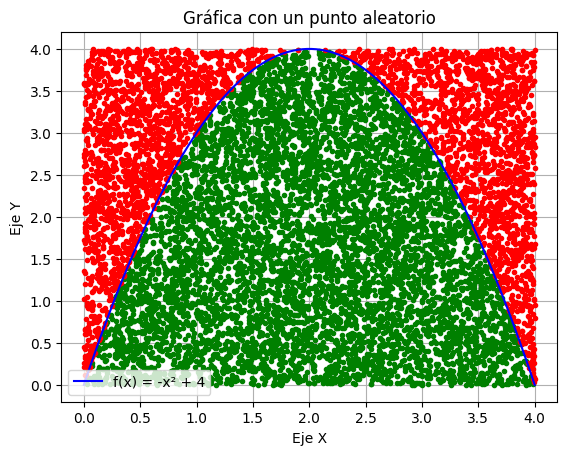

In [29]:
# Escribe aquí la solución del ejercicio 1.
import numpy as np
import matplotlib.pyplot as plt
import random



# Definir la función
def f(x):
    return -x**2 + 4*x  # Ejemplo de función cuadrática

# Generar el rango para la función
x = np.linspace(0, 4, 100)
y = f(x)
a = 0
b = 4
M = 4 #Maximo de la funcion F
X=[]
Y=[]
Yf = []
Xf = []
for i in range(10000):
    # Generar un punto aleatorio
    punto_x = np.random.rand() * (b-a)+a  # x entre 0 y 4
    punto_y = np.random.rand() * M            # y calculado con la función

    #Yf.append(f(punto_x))
    if punto_y < f(punto_x):
       Xf.append(punto_x)
       Yf.append(punto_y)
    else:
        X.append(punto_x)
        Y.append(punto_y)
    # Dibujar el punto aleatorio
    
#plt.scatter(punto_x, punto_y, color='red', s=10)
# Dibujar la función
plt.plot(Xf, Yf, '.', color='green')
plt.plot(X, Y, '.', color='red')




plt.plot(x, y, label="f(x) = -x² + 4", color='blue')



# Etiquetas y leyenda
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfica con un punto aleatorio")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()



**Ejercicio 2:** Crea dos funciones en Python que calcule el mínimo común múltiplo de dos números y el máximo común divisor de dos números.

In [3]:
# Escribe aquí la solución del ejercicio 2.
def mcd(a, b):
    x = 0
    while b != 0:
        x = b
        b = a % b
        a = x
    return a

def mcm(a, b):
    x = a*b/mcd(a,b)
    return x

print('El mcd es', mcd(48, 18))
print('El mcm es', mcm(48, 18))



El mcd es 6
El mcm es 144.0


**Ejericico 3:** Crea usando POO la clase Figura y que hereden de ella la clase Cuadrilatero, Rectangulo, Rombo, Triangulo y Circulo. Usa la lógica para contruir las relaciones Es-Un de todas las clases. El código debe respetar las buenas prácticas de POO como por ejemplo encapsulacón, no repetir código innecesario, etc.

Las clases deben tener los siguientes métodos:
- Show() muestra la figura. Podeis optar por mostrarla usando alguna librería gráfica o simplemente por consola mostrando los valores de sus atributos.
- Area() devuelve el área de la figura.
- Equal(figura) devuelve True si dos figuras son iguales. Para que dós figuras sean iguales deben ser del mismo tipo, y además tener la misma forma (mismo área y dimensiones)
- OrderByArea(figura) devuelve dos figuras, la actual y la que se le pasa por parámetro, pero la primera será la que magor área tiene y la segunda la que menor área tiene. Utiiza la habilidad de Python para devolver más de una valor en una función.

In [40]:
# Escribe aquí la solución del ejercicio 3.
import math as mt

class Figura:
    def Show(self):
        return str(self)
    
    def Area(self):
        pass

    def Equal(self, figura):
        return isinstance(figura, self.__class__) and self.Area() == figura.Area()
    
    def OrderByArea(self, figura):
        return (self, figura) if self.Area() >= figura.Area() else (figura, self)

class Cuadrilatero(Figura):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __str__(self):
        return f"Cuadrilatero de lados {self.a} y {self.b}"
        
    def Area(self):
        return self.a * self.b
    
class Rectangulo(Cuadrilatero):
    def __init__(self, base, altura):
        super().__init__(base, altura)

    def __str__(self):
        return f"Rectangulo de base {self.a} y altura {self.b}"

    
class Rombo(Cuadrilatero):
    def __init__(self, d_mayor, d_menor):
        super().__init__(d_mayor, d_menor)

    def __str__(self):
        return f"Rombo de diagonal mayor {self.a} y diagonal menor {self.b}"
    
    def Area(self):
        return (self.a * self.b) / 2
    
class Triangulo(Figura):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def __str__(self):
        return f"Triangulo de base {self.base} y altura {self.altura}"
    
    def Area(self):
        return (self.base * self.altura) / 2
    
class Circulo(Figura):
    def __init__(self, radio):
        self.radio = radio

    def __str__(self):
        return f"Circulo de radio {self.radio}"
    
    def Area(self):
        return mt.pi * self.radio ** 2
    
cuadrilatero = Cuadrilatero(4, 5)
rectangulo = Rectangulo(4, 5)
rombo = Rombo(4, 5)
triangulo = Triangulo(4, 5)
circulo = Circulo(2)

# Show
print('Show\n')
print(cuadrilatero.Show())
print(rectangulo.Show())
print(rombo.Show())
print(triangulo.Show())
print(circulo.Show(), '\n')

# Area
print('Area\n')
print(f"Área del cuadrilatero: {cuadrilatero.Area()}") 
print(f"Área del rectángulo: {rectangulo.Area()}") 
print(f"Área del rombo: {rombo.Area()}") 
print(f"Área del triangulo: {triangulo.Area()}") 
print(f"Área del circulo: {circulo.Area()}", '\n') 

# Equal
print('Equal\n')
print(f"¿Cuadrilátero y rectángulo son iguales? {cuadrilatero.Equal(rectangulo)}") 
print(f"¿Rombo y rectángulo son iguales? {rombo.Equal(rectangulo)}") 
print(f"¿Rombo y triángulo son iguales? {triangulo.Equal(rombo)}", '\n') 

# OrderByArea
print('OrderByArea\n')
figura1, figura2 = rombo.OrderByArea(circulo)
print(f"Figura con mayor área: {figura1.Show()}") 
print(f"Figura con menor área: {figura2.Show()}") 

Show

Cuadrilatero de lados 4 y 5
Rectangulo de base 4 y altura 5
Rombo de diagonal mayor 4 y diagonal menor 5
Triangulo de base 4 y altura 5
Circulo de radio 2 

Area

Área del cuadrilatero: 20
Área del rectángulo: 20
Área del rombo: 10.0
Área del triangulo: 10.0
Área del circulo: 12.566370614359172 

Equal

¿Cuadrilátero y rectángulo son iguales? True
¿Rombo y rectángulo son iguales? False
¿Rombo y triángulo son iguales? False 

OrderByArea

Figura con mayor área: Circulo de radio 2
Figura con menor área: Rombo de diagonal mayor 4 y diagonal menor 5
